## Linear regression analysis: Modeling demand function of a product

**Sample data** - consumption chicken during 1960-1982 in US.

**Goal** - conduct the regression analysis and allocate the demand function.

*Source: Citibase and U.S. Department of Agriculture (D. Gujarati, Basic Econometrics, 2004)*

In [1]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# packages for statistical analysis 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import reset_ramsey

In [2]:
def myTSplot(x, label=None):
    df_chicken[x].plot()
    plt.title('Plot of '+ label)
    plt.xticks(range(24), df_chicken['year'], rotation='vertical')
    plt.grid()
    plt.show()

## 1. Getting and describing the data

### 1.1. Import the data

In [3]:
# read the data from MS Excel file
df_chicken = pd.read_excel('chicken.xlsx', 'data', index_col=None, na_values=['NA'])

In [4]:
# look at the head of the data frame
df_chicken.head(n=5)

,year,cons,pc,inc,pp,pb
0,1960,27.8,42.2,397.5,50.7,78.3
1,1961,29.9,38.1,413.3,52.0,79.2
2,1962,29.8,40.3,439.2,54.0,79.2
3,1963,30.8,39.5,459.7,55.3,79.2
4,1964,31.2,37.3,492.9,54.7,77.4


### 1.2. Describe the data

In [5]:
# calculate basic descriptive statistics
df_chicken.describe().round(2)

,year,cons,pc,inc,pp,pb
count,23.00,23.00,23.00,23.00,23.00,23.00
mean,1971.00,39.67,48.00,1035.07,90.40,124.43
std,6.78,7.37,11.12,617.85,35.22,51.50
min,1960.00,27.80,37.30,397.50,50.70,77.40
25%,1965.50,34.45,38.95,544.45,64.10,80.30
50%,1971.00,40.30,40.30,843.30,73.20,106.10
75%,1976.50,43.40,58.10,1399.50,125.75,143.25
max,1982.00,52.90,70.40,2478.70,168.20,232.60


### 1.3. Graphical analysis: individual time-series graphs

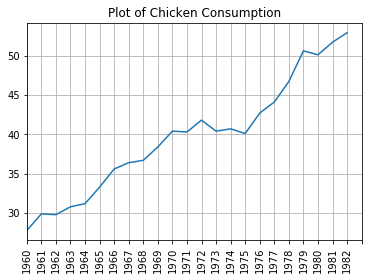

In [6]:
# Plot of Chicken Consumption
myTSplot('cons', 'Chicken Consumption')

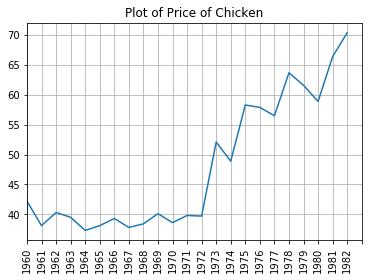

In [7]:
# Plot of Price of Chicken
myTSplot('pc', 'Price of Chicken')

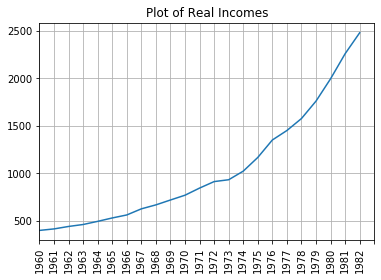

In [8]:
# Plot of Real Incomes
myTSplot('inc', 'Real Incomes')

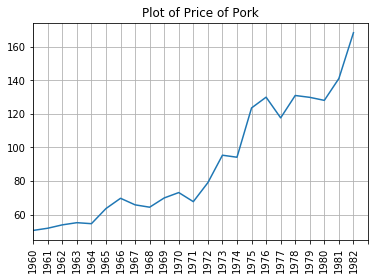

In [9]:
# Plot of Price of Pork
myTSplot('pp', 'Price of Pork')

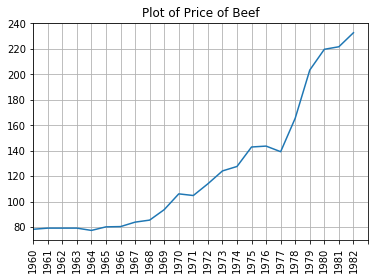

In [10]:
# Plot of Price of Beef
myTSplot('pb', 'Price of Beef')

## 2. Running a simple pair-wise analysis

In [11]:
# extract Cons and Pc
cons = df_chicken['cons']
pc = df_chicken['pc']

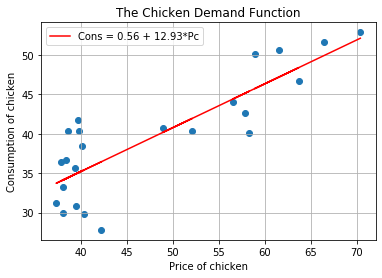

In [12]:
# scatter plot
plt.scatter(pc, cons)
plt.xlabel("Price of chicken")
plt.ylabel("Consumption of chicken")
plt.title("The Chicken Demand Function")
plt.grid()

#regression part
slopeY, interceptY, _, _, _ = stats.linregress(pc,cons)
lineY = slopeY*pc+interceptY
plt.plot(pc, lineY, 'r', label='Cons = {:.2f} + {:.2f}*Pc'.format(slopeY,interceptY))
#end

plt.legend()
plt.show()

In [13]:
# run a pair-wise correlation analysis
coefPears, pvPears=stats.pearsonr(cons, pc)

print("Pearson's correlation = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation =  0.84
Pearson's p-value =  0.0


## 3. Linear regression analysis

### 3.1. MODEL 1: Pair-wise linear regression

In [14]:
# add a constant term as a regressor
X = sm.add_constant(pc)
X.head()

C:\Users\danil\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,pc
0,1.0,42.2
1,1.0,38.1
2,1.0,40.3
3,1.0,39.5
4,1.0,37.3


In [15]:
# Note the argument order
model1 = sm.OLS(cons, X).fit()

# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     50.31
Date:                Thu, 07 May 2020   Prob (F-statistic):           5.36e-07
Time:                        15:21:54   Log-Likelihood:                -64.015
No. Observations:                  23   AIC:                             132.0
Df Residuals:                      21   BIC:                             134.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9330      3.865      3.346      0.003       4.896      20.970
pc             0.5571      0.079      7.093      0.000       0.394       0.720
==============================================================================
Omnibus:                        0.447   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.576
Skew:                          -0.227   Prob(JB):                        0.750
Kurtosis:                       2.371   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.2. MODEL 2: Multivariate linear regression

In [16]:
# make an extended set of regressors
XX = df_chicken[['pc', 'inc', 'pp', 'pb']]

# add a constant term as a regressor
XX = sm.add_constant(XX)

XX.head()

,const,pc,inc,pp,pb
0,1.0,42.2,397.5,50.7,78.3
1,1.0,38.1,413.3,52.0,79.2
2,1.0,40.3,439.2,54.0,79.2
3,1.0,39.5,459.7,55.3,79.2
4,1.0,37.3,492.9,54.7,77.4


In [17]:
# Note the argument order!
model2 = sm.OLS(cons, XX).fit()

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     73.87
Date:                Thu, 07 May 2020   Prob (F-statistic):           6.43e-11
Time:                        15:21:54   Log-Likelihood:                -45.214
No. Observations:                  23   AIC:                             100.4
Df Residuals:                      18   BIC:                             106.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2324      3.718     10.015      0.000      29.422      45.043
pc            -0.6112      0.163     -3.753      0.001      -0.953      -0.269
inc            0.0050      0.005      1.024      0.319      -0.005       0.015
pp             0.1984      0.064      3.114      0.006       0.065       0.332
pb             0.0695      0.051      1.363      0.190      -0.038       0.177
==============================================================================
Omnibus:                        2.004   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.088
Skew:                           0.098   Prob(JB):                        0.580
Kurtosis:                       1.953   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.3. MODEL 2: Statistical testing

#### 3.3.1. Tests of disturbances

Tests of disturbances include: a normality test, a heteroskedasticity test, an autocorrelation test. 

In [18]:
# store model residuals
resids2 = model2.resid
resids2.head()

0   -1.134018
1   -1.939483
2   -1.221497
3   -1.071088
4   -1.937874
dtype: float64

In [19]:
# The Shapiro-Wilk normality test
SW_test = pd.DataFrame(stats.shapiro(resids2), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value'])

print('\n --- The Shapiro-Wilk normality test ---')
print(SW_test)


 --- The Shapiro-Wilk normality test ---
                         value
chi^2 test statistic  0.948906
chi^2 test p-value    0.277689


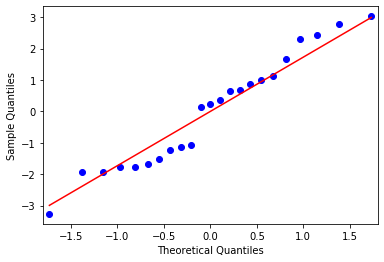

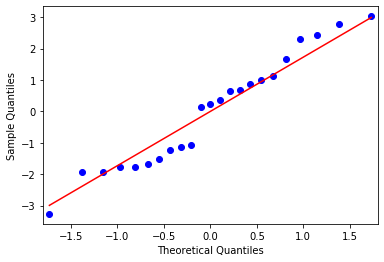

In [20]:
# Visual Normality Test
qqplot(resids2, line='s')

In [21]:
# The Breusch-Pagan heteroskedasticity test

bp_test = pd.DataFrame(sms.het_breuschpagan(resids2, model2.model.exog), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Pagan test ---')
print(bp_test)


 --- The Breusch-Pagan test ---
                         value
chi^2 test statistic  6.428253
chi^2 test p-value    0.169368
F-test statistic      1.745570
F-test p-value        0.183967


C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


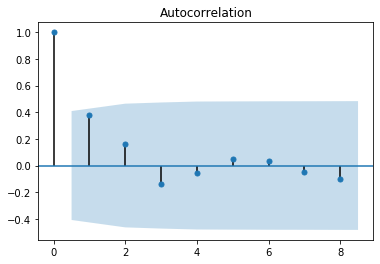

In [22]:
# Graphical Autocorrelation Test
acf = smt.graphics.plot_acf(resids2, lags=8 , alpha=0.05)
acf.show()

#### 3.3.2. Tests of regressors and the model

Tests of disturbances include: a specification test, a multicollinearity test. 

In [23]:
# The RESET test
# degree - we test our model on Nth degree. e.g. wether we have 3rd degree in model or not
reset = reset_ramsey(model2, degree=3) 
print(reset)

<F test: F=array([[19.80618971]]), p=4.6944859623973766e-05, df_denom=16, df_num=2>


In [24]:
# Multicollinearity Test
vif = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=XX.columns)
# the numbers show the multiplication. e.g. standard error of pc is 18.9 times higher than pure standard error.
# the highest VIFs are of Income and PriceBeef - not suprisingly since they are insignificant

,vif
const,83.326450
pc,18.901276
inc,52.701042
pp,29.050988
pb,39.761414


In [25]:
# Correlation analysis
XX.corr().round(3)

,const,pc,inc,pp,pb
const,NaN,NaN,NaN,NaN,NaN
pc,NaN,1.000,0.932,0.970,0.928
inc,NaN,0.932,1.000,0.957,0.986
pp,NaN,0.970,0.957,1.000,0.941
pb,NaN,0.928,0.986,0.941,1.000


### 3.3. MODEL 3: Multivariate logarithmic regression

In [26]:
# take log of cons
logcons = np.log(df_chicken[['cons']])
logcons.columns = ['logcons']

# transform the regressors
XXL = np.log(df_chicken[['pc', 'inc', 'pp', 'pb']])
XXL.columns = ['logpc', 'loginc', 'logpp', 'logpb']

# add a constant term as a regressor
XXL = sm.add_constant(XXL)

XXL.head()

,const,logpc,loginc,logpp,logpb
0,1.0,3.742420,5.985195,3.925926,4.360548
1,1.0,3.640214,6.024174,3.951244,4.371976
2,1.0,3.696351,6.084955,3.988984,4.371976
3,1.0,3.676301,6.130574,4.012773,4.371976
4,1.0,3.618993,6.200306,4.001864,4.348987


In [27]:
# Estimate the logarithmic regression
model3 = sm.OLS(logcons, XXL).fit()

# Print out the statistics
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logcons   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     249.9
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.67e-15
Time:                        15:21:55   Log-Likelihood:                 52.759
No. Observations:                  23   AIC:                            -95.52
Df Residuals:                      18   BIC:                            -89.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1898      0.156     14.063      0.000       1.863       2.517
logpc         -0.5046      0.111     -4.550      0.000      -0.738      -0.272
loginc         0.3426      0.083      4.114      0.001       0.168       0.517
logpp          0.1485      0.100      1.490      0.153      -0.061       0.358
logpb          0.0911      0.101      0.905      0.378      -0.120       0.303
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.078
Skew:                           0.427   Prob(JB):                        0.583
Kurtosis:                       2.370   Cond. No.                         388.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary

As a result, we can conclude that the consumption chicken was mostly driven by the price of chicken itself and the level of income. Suprisingly, that the prices of pork and beef have much less effect on the chicken consumption. This can be explained by the fact that chicken may be considered as of the different group of product.

As an assumption, beef can be considered as a more premium product, whereas chicken is cheap and affordable to everyone - that is why they may not have much correlation between each other. As for the pork, it is also considered as insignificant regessor in logarithmic regression (though it was significan in linear reg), it can be reffered as the middle class between cheap and premium and might have some correlation with both classes.